# <center> Gender Biais detection</center>
## <center> Application of the CALISKAN  and Bolukbasi Paper to french  </center>
### <center> Quillivic Robin </center>
Sources : Semantics derived automatically from language corpora necessarily contain human biases, 2016
Sources : Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings, Bolukbasi, Tolga, 2016

In [162]:
from gensim import *
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
import logging
import gensim
import os

import itertools

from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

import matplotlib.pyplot as plt
from random import *

import pandas as pd
import numpy as np
import math

from sklearn.decomposition import PCA
import lib
import fasttext
from gensim.models.wrappers import FastText
import random

In [2]:
# Logging code taken from http://rare-technologies.com/word2vec-tutorial/
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Load pre-trained Word2Vec model.
#model  = gensim.models.KeyedVectors.load_word2vec_format(r'DATA\FR\cc.fr.300.vec', binary=False,limit=50000)
#model  = gensim.models.KeyedVectors.load_word2vec_format(r'DATA\FR\frWac_no_postag_no_phrase_500_skip_cut100.bin', binary=True,limit=50000)
model  = gensim.models.KeyedVectors.load_word2vec_format(r'DATA\FR\fr_Kyubyong_wordvectors.vec',binary=False,limit=50000)
#model  = gensim.models.KeyedVectors.load_word2vec_format(r'DATA\FR\wiki_fr.vec',binary=False,limit=50000)

# normalizeation :
model.init_sims(True)

2019-02-24 14:33:15,103 : INFO : loading projection weights from DATA\FR\fr_Kyubyong_wordvectors.vec
2019-02-24 14:33:28,226 : INFO : loaded (50000, 300) matrix from DATA\FR\fr_Kyubyong_wordvectors.vec
2019-02-24 14:33:28,226 : INFO : precomputing L2-norms of word weight vectors


## WEAT

In [24]:
#attributes
A = ['un','il','homme','mâle','fils','père','garçon']
B = ['une','elle','femme','femelle','mère','fille']

# targets
X = ['informaticien', 'ingénieur', 'scientifique','docteur'] 
Y = ['infirmière', 'professeure', 'libraire','secrétaire']

# targets
X=['mathématiques', 'algèbre', 'géométrie', 'calcul', 'équation']# 'computation', 'numbers', 'addition']
Y =['poésie', 'art', 'danse', 'littérature', 'roman']# 'symphony', 'drama', 'sculpture']  

In [25]:
for x in X:
    print('Association of',x,'with the attributes A,B is : ',lib.s(x,A,B,model)*100)

Association of mathématiques with the attributes A,B is :  4.592797426240786
Association of algèbre with the attributes A,B is :  2.3612423844280697
Association of géométrie with the attributes A,B is :  -0.37555119821003485
Association of calcul with the attributes A,B is :  1.2399334460496902
Association of équation with the attributes A,B is :  -1.6714801923150113


In [26]:
for x in Y:
    print('Association of',x,'with the attributes A,B is : ',lib.s(x,A,B,model)*100)

Association of poésie with the attributes A,B is :  -2.0372964086986745
Association of art with the attributes A,B is :  2.8469696774014395
Association of danse with the attributes A,B is :  -3.7968011839049214
Association of littérature with the attributes A,B is :  -0.655995238394963
Association of roman with the attributes A,B is :  2.7817171953973316


In [28]:
e= lib.effet_size(X,Y,A,B,model)
print(' the effect size is',e)

 the effect size is 0.08083034426778109


In [29]:
p = lib.p_values(X,Y,A,B,model)
print(' the p values is',p)

30512
 the ps values is 0.15062744981882448


## Comment : 
For this example, we do not find any significant p value or effet size. That means , we are not observing any biais. more over, we observe that the sig of the association is direcly correlated with the gender !

# Does the association coeficient (WEAT and WEFAT) reveal the gramatical gender ?

In [250]:
df = pd.read_csv(r'DATA\FR\dictionaire_fr.csv',sep=';',encoding='latin1')

In [270]:
def transform_genre(x):
    if 'f' in str(x):
        return(-1)
    if 'm' in str(x) :
        return(1)
    else :
        return(0)

def clean_mots(x):
    if ',' in str(x):
        return(x[:-1])
    else :
        return(x)
    
def clean_coef(x):
    if x <0:
        return(-1)
    if x >-0.005and x <+0.005:
        return(0)
    else :
        return(1)

def alea(result):
    
    L=[]
    for i in range(len(result)) :
        L.append(random.randint(-1,1))
    return(L)

    

In [271]:
df['Genre']=df['genre'].apply(lambda x: transform_genre(x))
df['Mot']= df['mots'].apply(lambda x: clean_mots(x))
df = df.drop(columns=['mots','genre'])
#df.head(50)

KeyError: 'genre'

In [253]:
df_model = pd.DataFrame(list(model.wv.vocab.items()), columns=['Mot','count'])


C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [254]:
result = pd.merge(df_model,df, on='Mot')

In [272]:
A = ['un','il','homme','mâle','fils','père','garçon','le','lequel','ce','son']
B = ['une','elle','femme','femelle','mère','fille','la','laquelle','cette','sa']
##
result['association_coef']= result['Mot'].apply(lambda x :lib.s(x,A,B,model))
result['Gender_pred']= result['association_coef'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[(result['Gender_pred'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print('Aléa : ', len(result[(result['random'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.6397573495100327
Aléa :  0.3616425571628558
 Seulement des 1 : 0.1279634390174236


In [273]:
result.groupby(by ='Gender_pred')['Mot'].count()

Gender_pred
-1     7456
 0     1264
 1    12286
Name: Mot, dtype: int64

In [269]:
result.groupby(by ='Genre')['Mot'].count()

Genre
-1     7795
 0     2728
 1    10483
Name: Mot, dtype: int64

In [274]:
A = ['un','il','le','lequel','ce','son','tout','celui']
B = ['une','elle','celle','la','laquelle','cette','sa','toute']
##
result['association_coef']= result['Mot'].apply(lambda x :lib.s(x,A,B,model)*100)
result['Gender_pred']= result['association_coef'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[(result['Gender_pred'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print('Aléa : ', len(result[(result['random'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.6598226784881008
Aléa :  0.33877741483901075
 Seulement des 1 : 0.1279634390174236


In [275]:
A = ['un','il','le']
B = ['une','elle','la']
##
result['association_coef']= result['Mot'].apply(lambda x :lib.s(x,A,B,model)*100)
result['Gender_pred']= result['association_coef'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[(result['Gender_pred'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print('Aléa : ', len(result[(result['random'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.6584227718152124
Aléa :  0.33971068595426973
 Seulement des 1 : 0.1279634390174236


In [183]:
A = ['un','le']
B = ['une','la']
##
result['association_coef']= result['Mot'].apply(lambda x :lib.s(x,A,B,model)*100)
result['Gender_pred']= result['association_coef'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[(result['Gender_pred'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print('Aléa : ', len(result[(result['random'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.652356509566029
Aléa :  0.5254316378908073
 Seulement des 1 : 0.6289155479386842


In [184]:
A = ['homme']
B = ['femme']
##
result['association_coef']= result['Mot'].apply(lambda x :lib.s(x,A,B,model)*100)
result['Gender_pred']= result['association_coef'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[(result['Gender_pred'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print('Aléa : ', len(result[(result['random'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.6038264115725618
Aléa :  0.5300979934671022
 Seulement des 1 : 0.6289155479386842


In [185]:
A = ['un','homme']
B = ['une','femme']
##
result['association_coef']= result['Mot'].apply(lambda x :lib.s(x,A,B,model)*100)
result['Gender_pred']= result['association_coef'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[(result['Gender_pred'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print('Aléa : ', len(result[(result['random'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.6630891273915073
Aléa :  0.5142323845076995
 Seulement des 1 : 0.6289155479386842


In [234]:
result_M = result[result['Genre']==1]
result_F = result[result['Genre']==0]

In [241]:
A = ['un','homme']
B = ['une','femme']
##
result['association_coef']= result['Mot'].apply(lambda x :lib.s(x,A,B,model)*100)
result['Gender_pred']= result['association_coef'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[result['Gender_pred'] == result['Genre']])/len(result))
print('Aléa : ', len(result[result['random'] == result['Genre']])/len(result))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.6441016852327907
Aléa :  0.3303817956774255
 Seulement des 1 : 0.1279634390174236


In [190]:
A = ['un','il','homme','mâle','fils','père','garçon','le','lequel','ce','son']
B = ['une','elle','femme','femelle','mère','fille','la','laquelle','cette','sa']
##
result['association_coef']= result['Mot'].apply(lambda x :lib.s(x,A,B,model)*100)
result['Gender_pred']= result['association_coef'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[result['Gender_pred'] == result['Genre']])/len(result))
print('Aléa : ', len(result[result['random'] == result['Genre']])/len(result))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.7375511758545178
Aléa :  0.5310387508330953
 Seulement des 1 : 0.6289155479386842


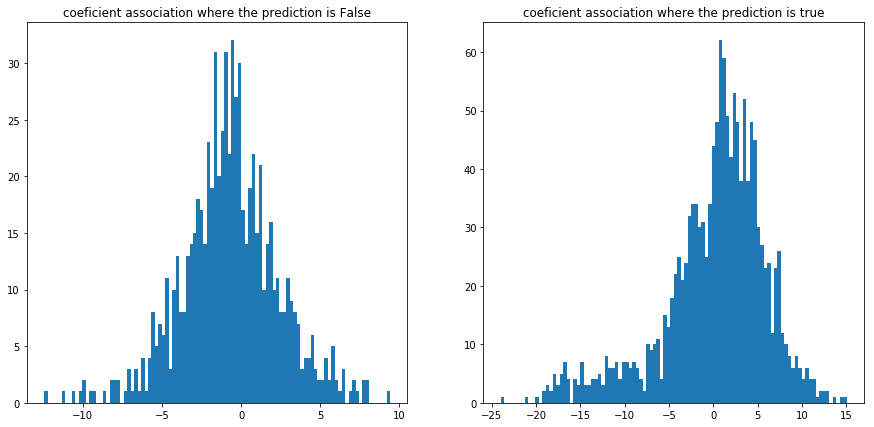

In [277]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hist(result[(result['Gender_pred'] != result['Genre']) & (result['type']=='N')]['association_coef'],bins=100)
plt.title('coeficient association where the prediction is False' )
plt.subplot(122)
plt.hist(result[(result['Gender_pred'] == result['Genre']) & (result['type']=='N')]['association_coef'],bins=100)
plt.title('coeficient association where the prediction is true' )
plt.show()

In [278]:
print( 'The mean, for False prediction ', abs(result[(result['Gender_pred'] != result['Genre']) & (result['type']=='N')]['association_coef']).mean())
print( 'The mean, for True prediction ', abs(result[(result['Gender_pred'] == result['Genre']) & (result['type']=='N')]['association_coef']).mean())

The mean, for False prediction  2.388882179134264
The mean, for True prediction  4.417127288259714


## Comment :
AS we anticipated, the Association play an important role in the grammatical gender. The lesss frequen word an thos who have a coeficient reaaly closed to 0 were linked to false prediction.

## 2) DIrect Biais

In [205]:
lib.association_Genrator('une','un',model,top_n=1000)

,pair,score
348025,"(qu'un, qu'une)",8.982379e-01
38221,"(d'un, d'une)",8.877078e-01
208044,"(d’un, d’une)",8.569036e-01
425674,"(aucun, aucune)",7.322243e-01
237185,"(seul, seule)",7.034017e-01
332788,"(important, importante)",7.032869e-01
362244,"(appelé, appelée)",6.813930e-01
38680,"(d'un, qu'une)",6.325427e-01
33409,"(cette, d'un)",6.170636e-01
33819,"(cette, qu'un)",6.150932e-01


In [279]:
pair_g = [['la','le'],['elle','il'], ['appelée', 'appelé'],["""qu'une""", """qu'un"""],["""d'une""", """d'un"""],
          ['une','un'],['laquelle', 'lequel'],['cette', 'ce'],['seule', 'seul'],['celle','celui'],
          ['importante', 'important'],
          ['mienne','mien']]


Subs_genre = lib.from_pair_to_subspace(pair_g,model)
direction_g, expl_var_g,eig_values_g = lib.from_space_to_direction(Subs_genre)

##
result['direct_biais'] =result['Mot'].apply(lambda x:lib.cosine_similarity(model[x],direction_g))
result['Gender_pred_2']= result['direct_biais'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[(result['Gender_pred_2'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print('Aléa : ', len(result[(result['random'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.4255716285580961
Aléa :  0.34951003266448905
 Seulement des 1 : 0.1279634390174236


In [280]:
pair_g = [['le','la'],['un','une'],['il','elle'],['appelé', 'appelée'],
          ["""qu'un""", """qu'une"""],["""d'un""", """d'une"""],['un','une'],
          ['lequel', 'laquelle'],['ce', 'cette'],['seul', 'seule'],['celui','celle'],
          ['important', 'importante'],
          ['mien','mienne']]


Subs_genre = lib.from_pair_to_subspace(pair_g,model)
direction_g, expl_var_g,eig_values_g = lib.from_space_to_direction(Subs_genre)

##
result['direct_biais'] =result['Mot'].apply(lambda x:lib.cosine_similarity(model[x],direction_g))
result['Gender_pred_2']= result['direct_biais'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[(result['Gender_pred_2'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print('Aléa : ', len(result[(result['random'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.5025664955669622
Aléa :  0.3159122725151657
 Seulement des 1 : 0.1279634390174236


In [281]:
pair_g = [['la','le'],['elle','il'], ['femme', 'homme'],['fille','garçon'],['père','mère'],['fille','fils'],
          ['une','un']]


Subs_genre = lib.from_pair_to_subspace(pair_g,model)
direction_g, expl_var_g,eig_values_g = lib.from_space_to_direction(Subs_genre)

##
result['direct_biais'] =result['Mot'].apply(lambda x:lib.cosine_similarity(model[x],direction_g))
result['Gender_pred_2']= result['direct_biais'].apply(lambda x : clean_coef(x))
result['random'] = alea(result)
##
print('Prediction : ',len(result[(result['Gender_pred_2'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print('Aléa : ', len(result[(result['random'] == result['Genre']) & (result['type']=='N')])/len(result[result['type']=='N']))
print(' Seulement des 1 :',  result['Genre'].sum()/len(result))

Prediction :  0.4456369575361643
Aléa :  0.33924405039664024
 Seulement des 1 : 0.1279634390174236


# Comment :
The direct biais doesn't seem related to the gramatical gender because when we are using it to do classification. It is less preformant than the random.